Q2.(a)
We have $\frac{da}{dt} = 0.005b(t)-0.05a(t), \frac{db}{dt} = 0.05a(t)+0.4c(t)-0.705b(t), \frac{dc}{dt}=0.7b(t)-0.4c(t)$. Given $a(0)=1.5, b(0)=3, c(0)=2$

In [47]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

In [48]:
def system(t, y):
    dydt = [0.005*y[1]-0.05*y[0], 0.05*y[0]+0.4*y[2]-0.705*y[1], 0.7*y[1]-0.4*y[2]]
    return dydt

In [157]:
y0 = [1.5, 3, 2]  # Initial conditions for y1 and y2
ts_1 = 18.18
ts_2 = 0.91
t_span1 = (0, ts_1 * 5)  # Time span from 0 to 10
t_span2 = (0, ts_2 * 5)  # Time span from 0 to 10

In [158]:
solution1 = solve_ivp(system, t_span1, y0, t_eval=np.linspace(0, ts_1 * 5, 1000))
solution2 = solve_ivp(system, t_span2, y0, t_eval=np.linspace(0, ts_2 * 5, 1000))

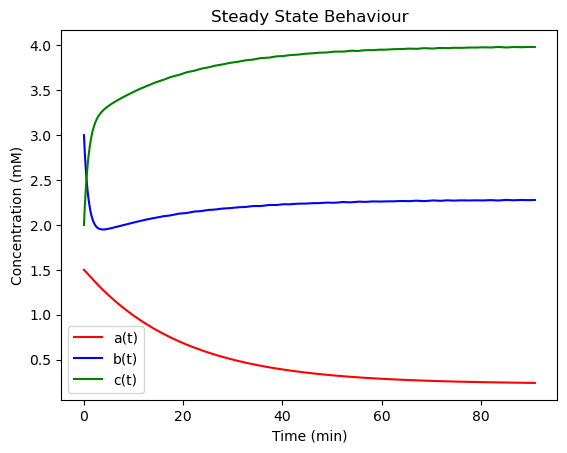

In [161]:
plt.plot(solution1.t, solution1.y[0], label='a(t)', color='red')
plt.plot(solution1.t, solution1.y[1], label='b(t)', color='blue')
plt.plot(solution1.t, solution1.y[2], label='c(t)', color='green')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mM)')
plt.title('Steady State Behaviour')
plt.legend()
plt.show()

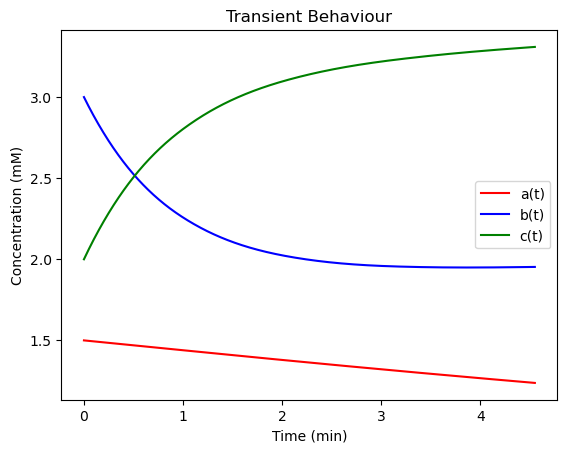

In [163]:

plt.plot(solution2.t, solution2.y[0], label='a(t)', color='red')
plt.plot(solution2.t, solution2.y[1], label='b(t)',  color='blue')
plt.plot(solution2.t, solution2.y[2], label='c(t)',  color='green')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mM)')
plt.title('Transient Behaviour')
plt.legend()
plt.show()

(c)

In [146]:
def reduced_system(t, y):
    dydt = [-7/11 * y[0] + 0.4 * y[1], 7/11 * y[0] - 0.4 * y[1]]
    return dydt

In [147]:
y_0_reduced = [4.5, 2]
time_scale = 100
sampling_rate = 1000
t_span1 = (0, time_scale)
t_span1_reduced = (0, time_scale)  # Time span from 0 to 10

In [148]:
solution1 = solve_ivp(system, t_span1, y0, t_eval=np.linspace(0, time_scale, sampling_rate))
solution1_reduced = solve_ivp(reduced_system, t_span1_reduced, y_0_reduced, t_eval=np.linspace(0, time_scale, sampling_rate))

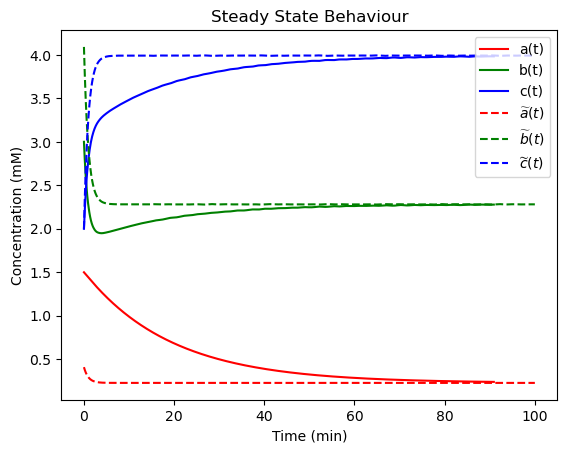

In [171]:
plt.plot(solution1.t, solution1.y[0], label='a(t)', color='red')
plt.plot(solution1.t, solution1.y[1], label='b(t)', color='green')
plt.plot(solution1.t, solution1.y[2], label='c(t)', color='blue')

plt.plot(solution1_reduced.t, 1/11*solution1_reduced.y[0], label='$\widetilde{a}(t)$', linestyle='dashed', color='red')
plt.plot(solution1_reduced.t, 10/11*solution1_reduced.y[0], label='$\widetilde{b}(t)$', linestyle='dashed', color='green')
plt.plot(solution1_reduced.t, solution1_reduced.y[1], label='$\widetilde{c}(t)$', linestyle='dashed', color='blue')

plt.xlabel('Time (min)')
plt.ylabel('Concentration (mM)')
plt.title('Steady State Behaviour')
plt.legend()
plt.show()

3. Quasi-steady-state approximation

(a).

In [172]:
def system2(t, y):
    dydt = [1 + 8*y[1] - 11.2*y[0], 11*y[0] - 8*y[1]]
    return dydt

In [179]:
init2 = [6, 0]
time_scale2 = 100
# time_scale2 = 5/19
sampling_rate2 = 1000
t_span2 = (0, time_scale2)

In [180]:
solution2 = solve_ivp(system2, t_span2, init2, t_eval=np.linspace(0, time_scale2, sampling_rate2))

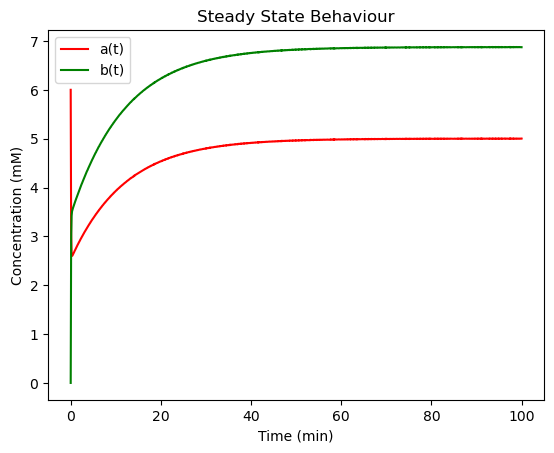

In [181]:
plt.plot(solution2.t, solution2.y[0], label='a(t)', color='red')
plt.plot(solution2.t, solution2.y[1], label='b(t)', color='green')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mM)')
plt.title('Steady State Behaviour')
# plt.title('Transient Behaviour')
plt.legend()
plt.show()

3.d

In [135]:
def reduced_system2(t, y):
    dydt = [1 - 0.2*y[0]]
    return dydt

In [142]:
reduced_init2 = [48/19]
reduced_time_scale2 = 100
reduced_sampling_rate2 = 1000
reduced_t_span2 = (0, reduced_time_scale2)

In [143]:
reduced_solution2 = solve_ivp(reduced_system2, reduced_t_span2, reduced_init2, t_eval=np.linspace(0, reduced_time_scale2, reduced_sampling_rate2))

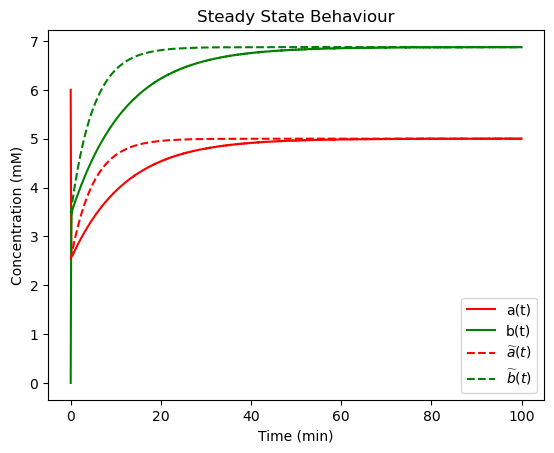

In [183]:
plt.plot(solution2.t, solution2.y[0], label='a(t)',color='red')
plt.plot(solution2.t, solution2.y[1], label='b(t)', color='green')
plt.plot(reduced_solution2.t, reduced_solution2.y[0], label='$\widetilde{a}(t)$', linestyle='dashed', color='red')
plt.plot(reduced_solution2.t, reduced_solution2.y[0] * 11/8, label='$\widetilde{b}(t)$', linestyle='dashed', color='green')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mM)')
plt.title('Steady State Behaviour')
# plt.title('Transient Behaviour')
plt.legend()
plt.show()